<a href="https://colab.research.google.com/github/Sahil-Jagadale/DL/blob/main/DL_FeedForward_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [4]:
from tensorflow.keras import models, layers, optimizers, datasets

In [5]:
(train_x,train_y),(test_x,test_y) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
lb = LabelBinarizer()

In [7]:
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [8]:
train_x = train_x.reshape((train_x.shape[0], 28*28))
test_x = test_x.reshape((test_x.shape[0], 28*28))

In [9]:
model = models.Sequential()

model.add(layers.Dense(128, activation='sigmoid', input_shape=(28*28,)))

model.add(layers.Dense(10, activation='sigmoid'))

model.summary()

output_layer_weights = model.layers[-1].get_weights()[0]
print("Output layer weight shape: ",output_layer_weights.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Output layer weight shape:  (128, 10)


In [10]:
model.compile(optimizer=optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x,train_y,
                    epochs=20,
                    batch_size=128,
                    validation_data=(test_x,test_y))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2038 - loss: 0.3910 - val_accuracy: 0.5633 - val_loss: 0.2608
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6045 - loss: 0.2513 - val_accuracy: 0.7145 - val_loss: 0.2214
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7299 - loss: 0.2156 - val_accuracy: 0.7700 - val_loss: 0.1967
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7774 - loss: 0.1929 - val_accuracy: 0.8069 - val_loss: 0.1781
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8098 - loss: 0.1754 - val_accuracy: 0.8287 - val_loss: 0.1638
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8304 - loss: 0.1614 - val_accuracy: 0.8433 - val_loss: 0.1527
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8354 - loss: 0.1515 - val_accuracy: 0.8526 - val_loss: 0.1435
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8490 - loss: 0.1424 - val_accuracy: 0.

In [11]:
predictions = model.predict(test_x)

prediction_class = predictions.argmax(axis=1)
true_class = test_y.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


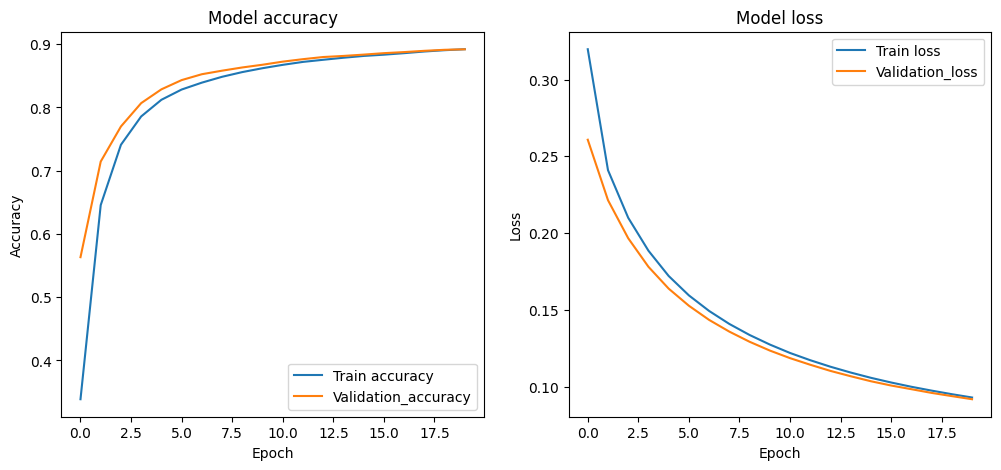

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [13]:
report = classification_report(true_class, prediction_class)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.86      0.88      1032
           3       0.86      0.89      0.87      1010
           4       0.87      0.91      0.89       982
           5       0.89      0.78      0.83       892
           6       0.90      0.93      0.91       958
           7       0.90      0.90      0.90      1028
           8       0.86      0.83      0.85       974
           9       0.88      0.85      0.87      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

